In [14]:
import numpy as np
from matplotlib import pyplot as plt
import json, os
#plt.style.use("./tplot.mplstyle")

In [50]:
run = 1
beta  = 0.0
alpha = 0.1
chi = 0.0
gamma = 5.0
D=1.0
K=1
#ct=1.0
#et=0.5

ddir = 'data' #'/new_drho_data'#
model = '/model_tanh_implicit/p_half_xi_0.05' # '/model_hill'#

pdir = '../../'+ddir+model+'/D_{:1.1f}_K_{:d}/alpha_{:1.1f}_beta_{:1.4f}_chi_{:1.1f}_gamma_{:1.1f}/run_{:d}/'.format(D, K, alpha, beta, chi, gamma, run)

datadir = pdir+'data/'

with open(pdir+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]
n_steps   = int(parameters["n_steps"])  # number of time steps
n_dump = int(T/dt_dump); dn_dump = int(n_steps/n_dump)
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])
mu        = np.float32(parameters["mu"])
lambd        = np.float32(parameters["lambd"])
dx        = np.float32(parameters["dx"])
dy        = np.float32(parameters["dy"])
#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, mx*dx-tol, mx)
y   = np.linspace(0+tol, mx*dx-tol, my)
xv, yv  = np.meshgrid(x,y, indexing='ij')


times = np.arange(0, n_dump, 1)*dt_dump

print(n_dump, T, mx, dx)

20 200 200 0.5


0.9999999342284623 1.1622900729155883e-06 0.9991454018598795


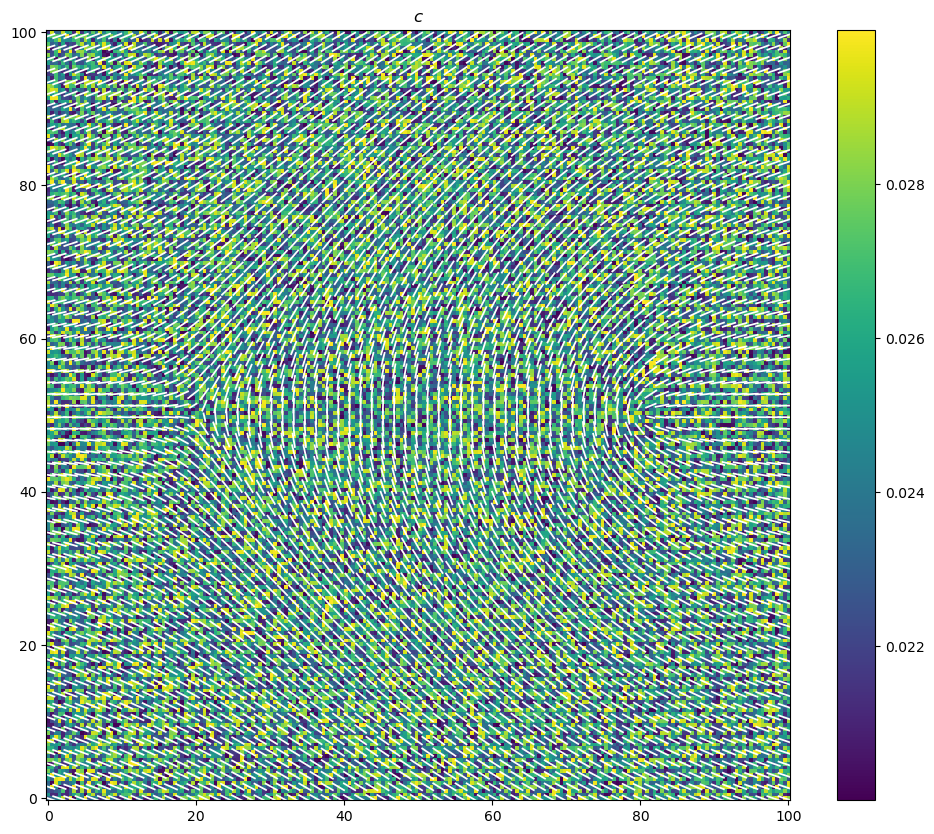

In [51]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax=plt.subplots(figsize=(12,10))
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
n=0

field = np.loadtxt(datadir+'c.csv.{:d}'.format(n), delimiter=',')
c=np.copy(field)
ct=0.1
denom = np.gradient(c, dx, dy)[1]**2 + np.gradient(c, dx, dy)[0]**2 +ct**2
cxx = gamma*(np.gradient(c, dx, dy)[1]**2-np.gradient(c, dx, dy)[0]**2)/2
cxy = gamma*(np.gradient(c, dx, dy)[1]*np.gradient(c, dx, dy)[0])

Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
#Qxx = cxx/denom
#Qxy = cxy/denom
S = 2*np.sqrt(Qxx**2+Qxy**2)

p_factor = 3
theta = np.arctan2(Qxy, Qxx)/2
Snx    = S*np.cos(theta)
Sny    = S*np.sin(theta)
print(np.max(S), np.min(S), np.average(S))

fmin = np.min(field); fmax = np.max(field)

ctrf = [ax.pcolormesh(xv, yv, field, vmin=fmin, vmax=fmax), ax.quiver(xv[::p_factor, ::p_factor], yv[::p_factor, ::p_factor], Snx[::p_factor, ::p_factor], Sny[::p_factor, ::p_factor], color='w', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]
plt.colorbar(ctrf[0])
plt.title(r"$c$")
plt.show()

0.9999999342284623 1.1622900729155883e-06 0.9991454018598795


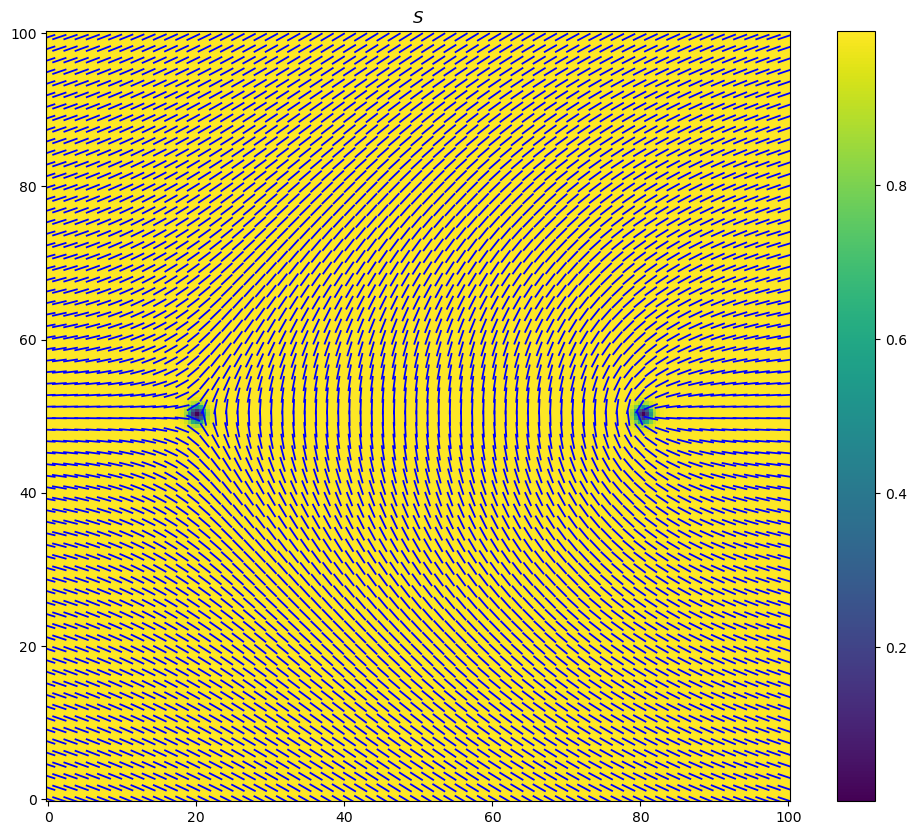

In [52]:
fig, ax=plt.subplots(figsize=(12,10),nrows=1)
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=0

Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S = 2*np.sqrt(Qxx**2+Qxy**2)

p_factor = 3
theta = np.arctan2(Qxy, Qxx)/2
Snx    = np.cos(theta)
Sny    = np.sin(theta)
print(np.max(S), np.min(S), np.average(S))

plot1 = [ax.pcolormesh(xv, yv, S, cmap='viridis', vmin=np.min(S), vmax=np.max(S)), ax.quiver(xv[::p_factor, ::p_factor], yv[::p_factor, ::p_factor], Snx[::p_factor, ::p_factor], Sny[::p_factor, ::p_factor], color='b', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]

fig.colorbar(plot1[0], ax=ax)
ax.set_title(r"$ S $")
plt.show()

In [54]:
n=1
exx = np.loadtxt(datadir+'eiso.csv.{:d}'.format(n), delimiter=',')
#eyy = np.loadtxt(datadir+'eyy.csv.{:d}'.format(n), delimiter=',')
e_iso = exx#+eyy
#e_iso = e_iso+np.abs(e_iso)
#exy = np.loadtxt(datadir+'exy.csv.{:d}'.format(n), delimiter=',')

Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S = np.sqrt(Qxx**2+Qxy**2)
p_factor=3
theta = np.arctan2(Qxy, Qxx)/2
#theta = np.arctan2(exy, (exx-eyy)/2)
Snx    = np.cos(theta)
Sny    = np.sin(theta)

fig, ax=plt.subplots(figsize=(12,24),nrows=2)
plot1 = [ax[0].pcolormesh(xv, yv, e_iso, cmap='viridis', vmin=np.min(e_iso), vmax=np.max(e_iso)), ax[0].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[::p_factor, ::p_factor],Sny[::p_factor, ::p_factor], color='1', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]
#plot2 = [ax[1].pcolormesh(xv, yv, exy, cmap='viridis', vmin=np.min(exy), vmax=np.max(exy)), ax[1].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[::p_factor, ::p_factor],Sny[::p_factor, ::p_factor], color='b', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]

fig.colorbar(plot1[0], ax=ax[0])
#fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ e_{isotropic} $")
ax[1].set_title(r"$ exy $")
plt.show()

FileNotFoundError: ../../data/model_tanh_implicit/p_half/D_1.0_K_1/alpha_0.1_beta_0.0000_chi_0.0_gamma_5.0/run_1/data/eiso.csv.1 not found.

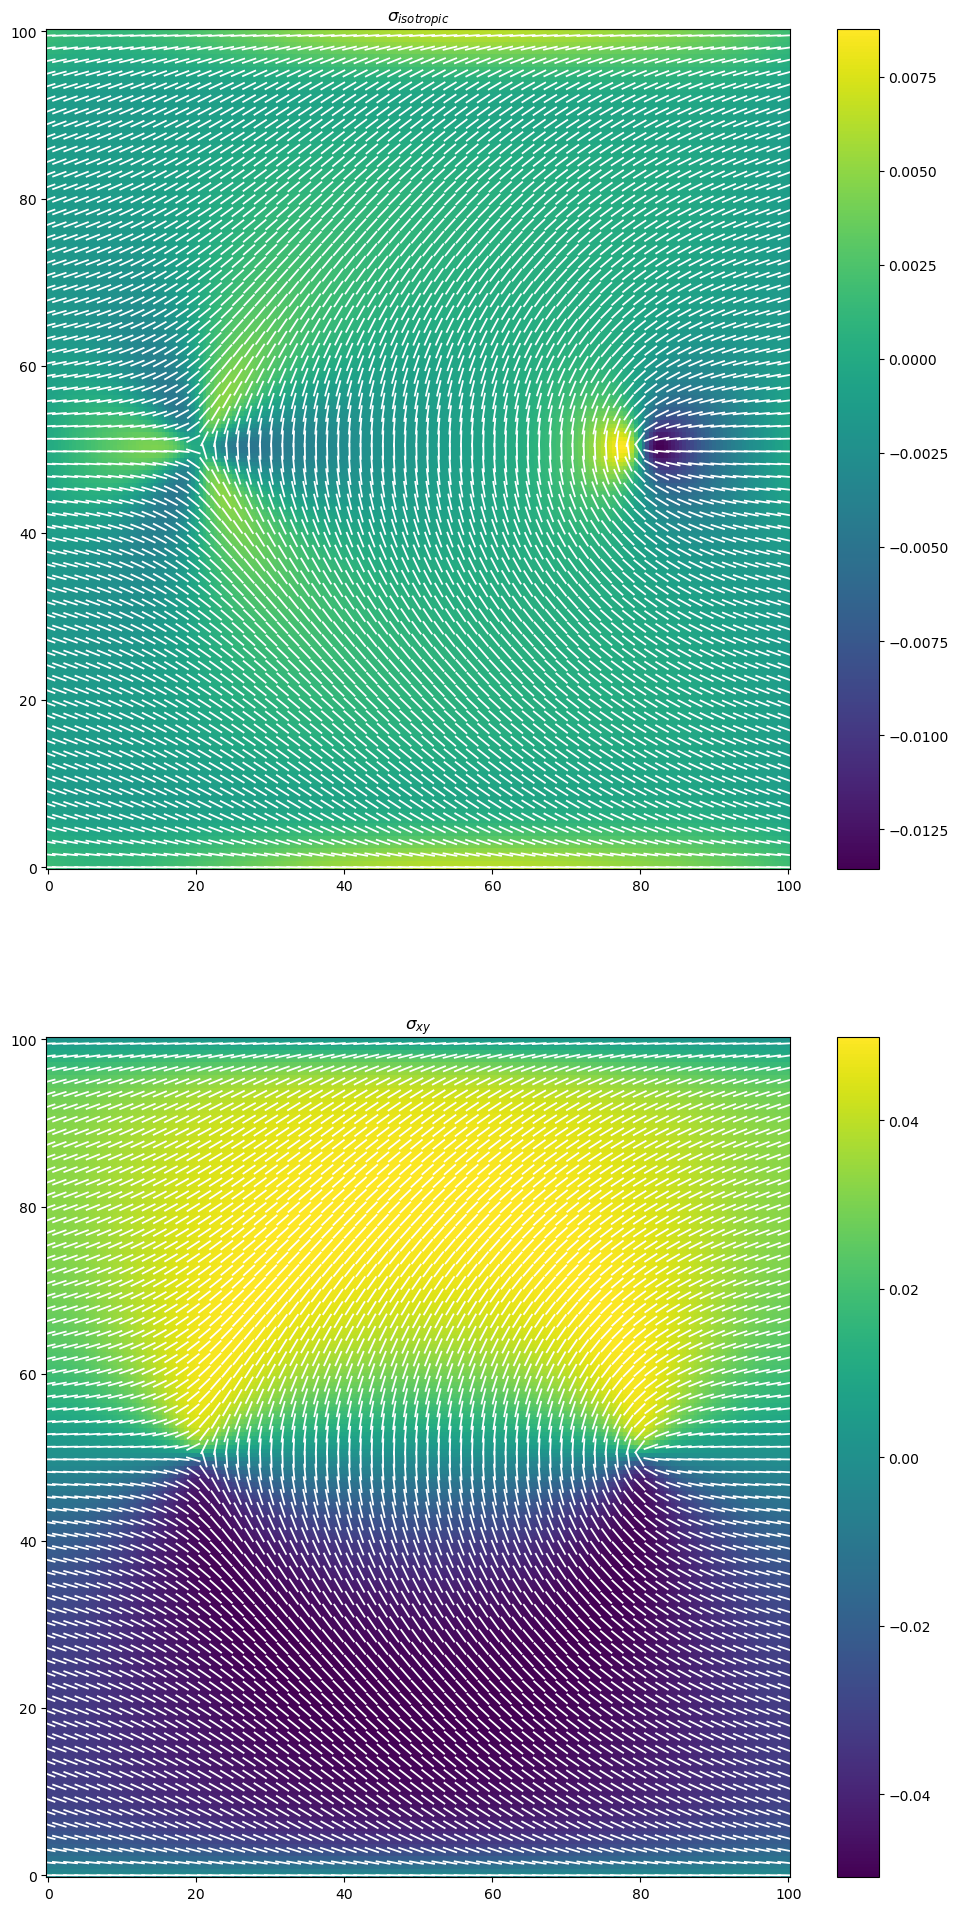

In [55]:
exx = np.loadtxt(datadir+'exx.csv.{:d}'.format(n), delimiter=',')
eyy = np.loadtxt(datadir+'eyy.csv.{:d}'.format(n), delimiter=',')
exy = np.loadtxt(datadir+'exy.csv.{:d}'.format(n), delimiter=',')

Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')

sigma_xx = 2*mu*exx + lambd*exx + lambd*eyy + alpha*Qxx
sigma_yy = 2*mu*eyy + lambd*eyy + lambd*exx - alpha*Qxx
sigma_xy = lambd*exy + alpha*Qxy

sigma_iso = exx + eyy

S = np.sqrt(Qxx**2+Qxy**2)
p_factor=3
theta = np.arctan2(Qxy, Qxx)/2
Snx    = np.cos(theta)
Sny    = np.sin(theta)

fig, ax=plt.subplots(figsize=(12,24),nrows=2)
plot1 = [ax[0].pcolormesh(xv, yv, sigma_iso, cmap='viridis', vmin=np.min(sigma_iso), vmax=np.max(sigma_iso)), ax[0].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[::p_factor, ::p_factor],Sny[::p_factor, ::p_factor], color='w', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]
plot2 = [ax[1].pcolormesh(xv, yv, sigma_xy, cmap='viridis', vmin=np.min(sigma_xy), vmax=np.max(sigma_xy)), ax[1].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[::p_factor, ::p_factor],Sny[::p_factor, ::p_factor], color='w', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]

fig.colorbar(plot1[0], ax=ax[0])
fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ \sigma_{isotropic} $")
ax[1].set_title(r"$ \sigma_{xy} $")
plt.show()

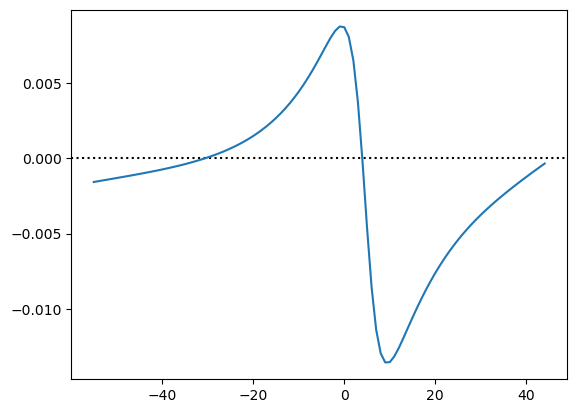

In [71]:
e_iso = exx+eyy

plt.axhline(0, linestyle='dotted', color='k')
plt.plot(rx, e_iso[mx//2:, mx//2])

np.savetxt('p_one_half_profile_r.csv', e_iso[mx//2:, mx//2])


In [73]:
dx

np.float32(0.5)